# Analysis and Visualizations

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the generated responses in a DataFrame and checking if rows loaded correctly

In [40]:
survey_data = pd.read_csv('simplified_responses.csv')
survey_data.head()


,Impact Rating,Most Visited Event,Visit Frequency,Benefits,Age,Gender
0,Positive,DIY Cinema,Monthly,Improved Social Connections,45-55,other
1,Positive,Concert,Weekly,Enhanced Cultural Awareness,18-30,other
2,Very negative,Exhibition,Weekly,Emotional Well-being,31-44,female
3,Very positive,Debates,Weekly,Improved Social Connections,31-44,male
4,Positive,Concert,Weekly,Support for Local Artists and Initiatives,18-30,other


Cleaning any missing values

In [41]:
survey_data.dropna(inplace = True)

Exploring the general statistics

In [42]:
survey_data.describe(include = 'all')

,Impact Rating,Most Visited Event,Visit Frequency,Benefits,Age,Gender
count,500,500,500,500,500,500
unique,5,9,2,6,5,3
top,Positive,Concert,Weekly,Inspiration and Creativity,31-44,female
freq,196,138,466,92,118,180


## Visualizations

### What events do respondents visit most often.


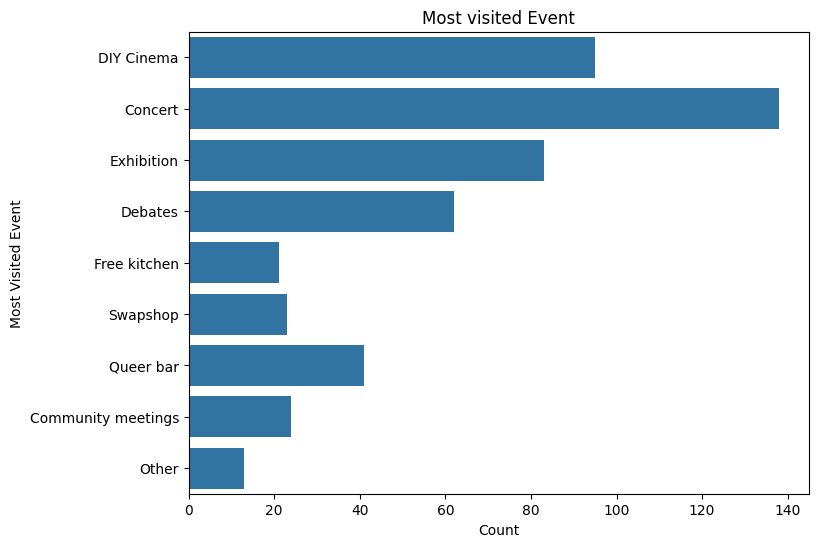

In [50]:
plt.figure(figsize = (8, 6))
sns.countplot(y = 'Most Visited Event', data = survey_data)
plt.title('Most visited Event')
plt.xlabel('Count')
plt.ylabel('Most Visited Event')

plt.show()

## How often do respondents go to DIY events, and what type?


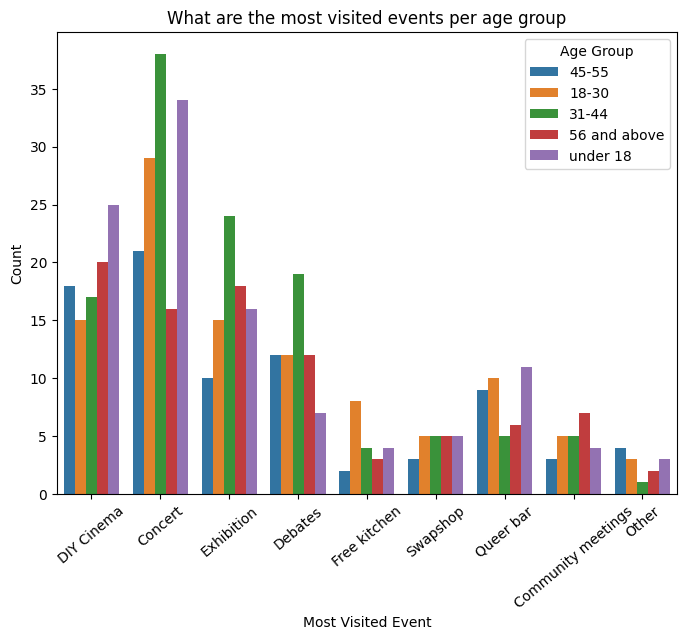

In [51]:
plt.figure(figsize = (8,6))
sns.countplot(data = survey_data, x='Most Visited Event', hue='Age')
plt.title('What are the most visited events per age group')
plt.xlabel('Most Visited Event')
plt.ylabel('Count')
plt.xticks(rotation = 40)
plt.legend(title='Age Group')
plt.show()

Text(0, 0.5, '')

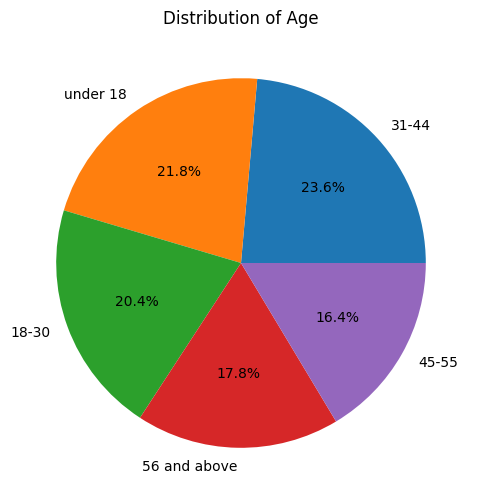

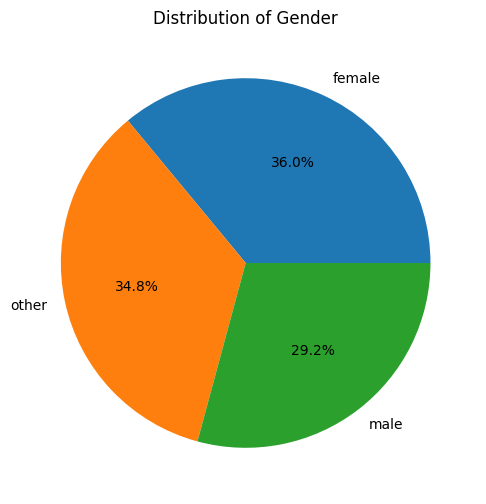

In [46]:
plt.figure(figsize = (6, 6))

community_connection = survey_data['Age'].value_counts()
community_connection.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Age')
plt.ylabel('')

plt.figure(figsize = (6, 6))

community_connection = survey_data['Gender'].value_counts()
community_connection.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Gender')
plt.ylabel('')

<Figure size 1200x800 with 0 Axes>

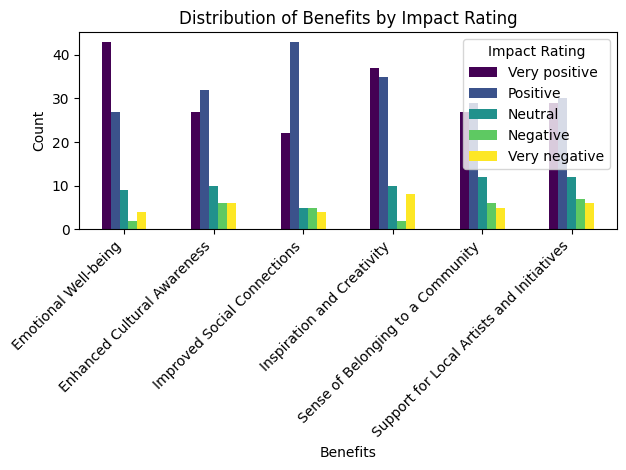

In [49]:
# Reorder the 'Impact Rating' column based on the desired order
survey_data['Impact Rating'] = pd.Categorical(survey_data['Impact Rating'], 
                                              categories=['Very positive', 'Positive', 'Neutral', 'Negative', 'Very negative'], 
                                              ordered=True)

# Create a cross-tabulation table
pivot_table = pd.crosstab(survey_data['Benefits'], survey_data['Impact Rating'])

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=False, cmap='viridis')

plt.title('Distribution of Benefits by Impact Rating')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title='Impact Rating')
plt.tight_layout()  # Adjust layout to fit the plot within the figure

plt.show()

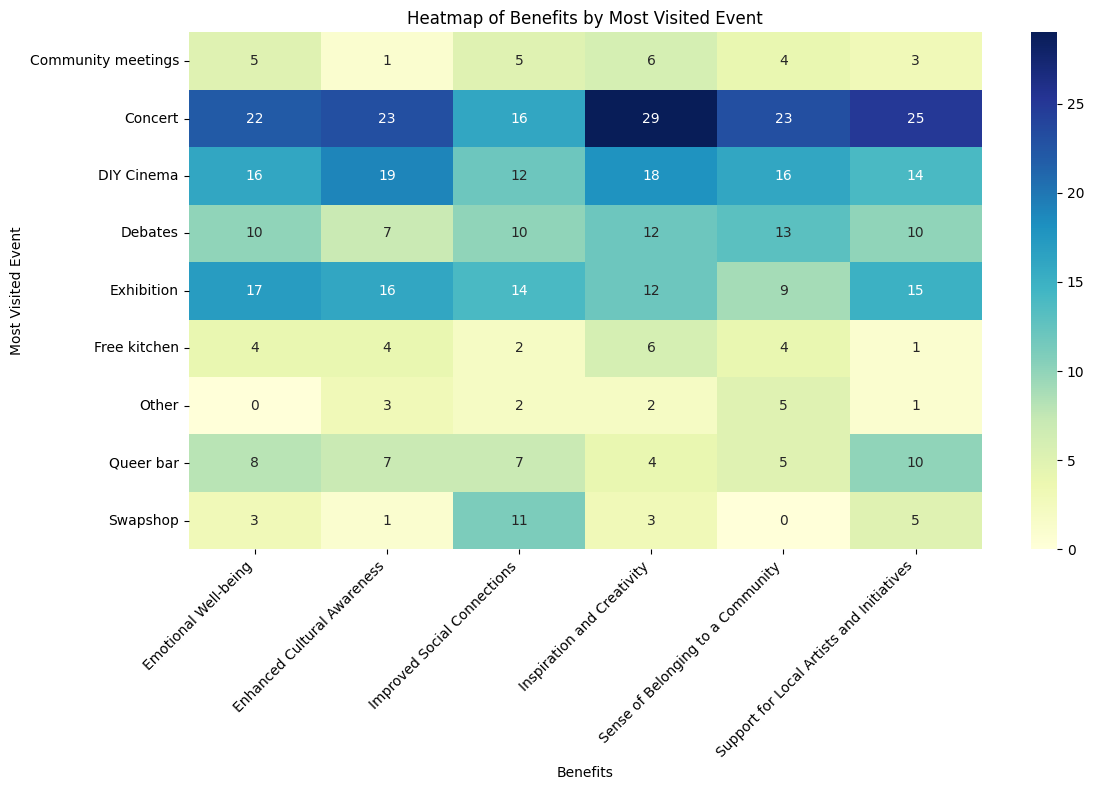

In [54]:
# Create a pivot table for the heatmap
heatmap_data = pd.crosstab(survey_data['Most Visited Event'], survey_data['Benefits'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Benefits by Most Visited Event')
plt.xlabel('Benefits')
plt.ylabel('Most Visited Event')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


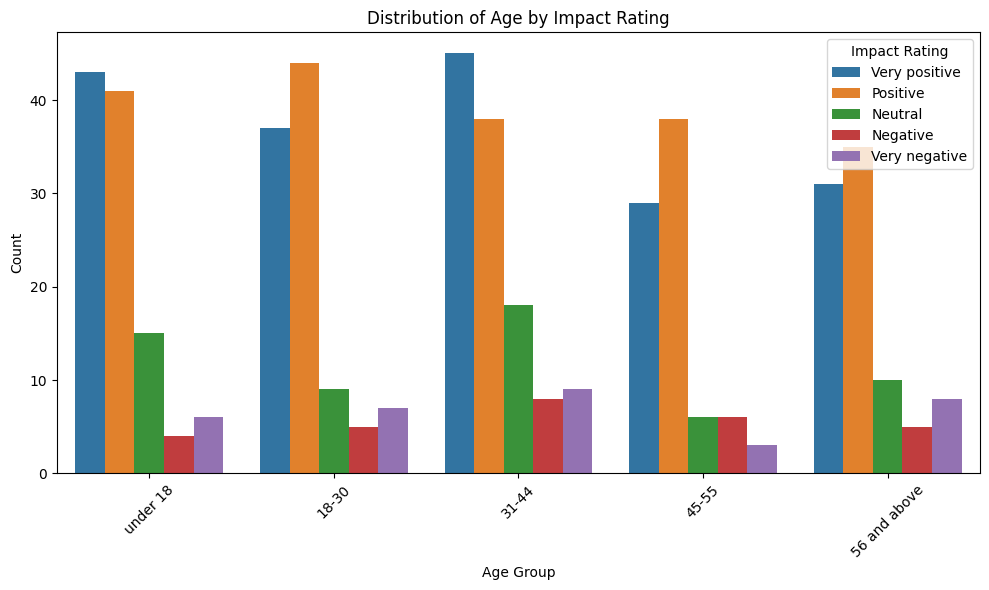

<Figure size 1200x800 with 0 Axes>

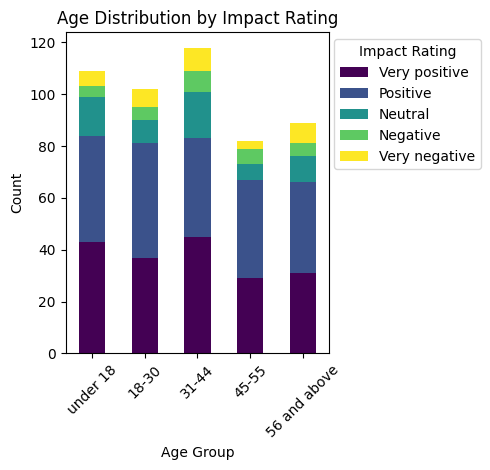

<Figure size 1200x800 with 0 Axes>

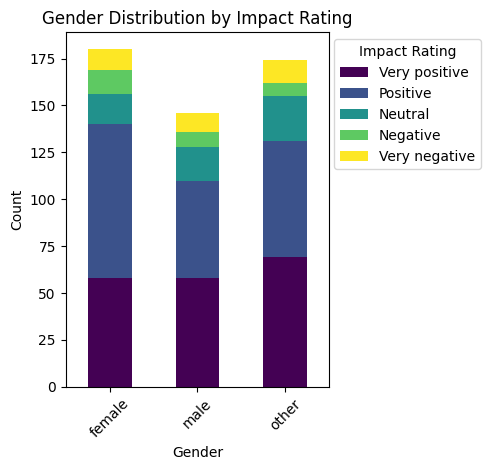

In [65]:
# Define the order for the 'Age' categories
age_order = ['under 18', '18-30', '31-44', '45-55', '56 and above']

# Convert 'Event Age' column to categorical with the defined order
survey_data['Age'] = pd.Categorical(survey_data['Age'], categories=age_order, ordered=True)

# Example of creating a count plot for Age by Impact Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=survey_data, x='Age', hue='Impact Rating', order=age_order)
plt.title('Distribution of Age by Impact Rating')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Impact Rating')
plt.tight_layout()
plt.show()

# Create a cross-tabulation table for Age and Impact Rating
age_impact_dist = pd.crosstab(survey_data['Age'], survey_data['Impact Rating'])

plt.figure(figsize=(12, 8))
age_impact_dist.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Age Distribution by Impact Rating')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Impact Rating', loc='upper right', bbox_to_anchor=(1.6, 1))
plt.tight_layout()
plt.show()

# Create a cross-tabulation table for Gender and Impact Rating
gender_impact_dist = pd.crosstab(survey_data['Gender'], survey_data['Impact Rating'])

plt.figure(figsize=(12, 8))
gender_impact_dist.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Gender Distribution by Impact Rating')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Impact Rating', loc='upper right', bbox_to_anchor=(1.6, 1))
plt.tight_layout()
plt.show()
